In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Encode the categorical columns
>>> from sklearn import preprocessing
>>> le = preprocessing.LabelEncoder()
#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)

#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)


In [9]:
# Create X from all the feature columns
X = df.drop("charges", axis=1)

# Create y (the target column)
Y= df["charges"]
X.head() 

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [10]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

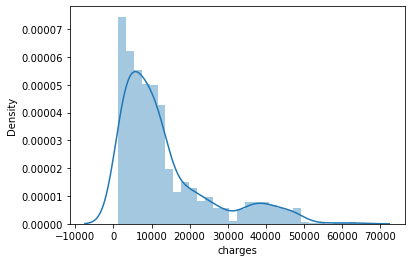

In [11]:
#checking for normalization using distplot
sns.distplot(Y)

In [17]:

#performing log transformation on target label
y=np.log10(Y)
print (y)

0       4.227499
1       3.236928
2       3.648308
3       4.342116
4       3.587358
          ...   
1333    4.025328
1334    3.343602
1335    3.212143
1336    3.302752
1337    4.464510
Name: charges, Length: 1338, dtype: float64


In [18]:
#splitting the data into the training set and the test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1003, 6), (335, 6), (1003,), (335,))

In [23]:
>>> from sklearn.ensemble import RandomForestRegressor
>>> from sklearn.datasets import make_regression
model=RandomForestRegressor()
model.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [28]:
model.score(X_test,y_test)

0.8079210017223201

In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:

reg.score(X_test,y_test)

0.7589479736374827

In [31]:
from sklearn.tree import DecisionTreeRegressor
reg1=DecisionTreeRegressor()
reg1.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [32]:
reg1.score(X_test,y_test)

0.6596468342311008

In [33]:
from sklearn.linear_model import Ridge
reg2=Ridge()
reg2.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [34]:
reg2.score(X_test,y_test)

0.7590901784986006

In [35]:
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor()
model1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [36]:
model1.score(X_test,y_test)

0.7935735675449191

In [37]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

r2_score(y_test, y_test_mean)

0.0

In [38]:
# perfect model would get a score of 1.
r2_score(y_test, y_test)

1.0

In [39]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.09392690672458641

In [40]:
df1 = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": y_preds})

df1.head(7)

,actual values,predictions
1261,3.515498,3.601557
3,4.342116,3.622320
216,4.015177,4.265995
696,4.465182,4.057008
833,4.069814,4.072594
1173,3.810088,3.816956
385,3.101011,3.107872


In [41]:

# Mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

0.031793873001109765